In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from datetime import datetime

import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

import hyclib as lib

In [2]:
lib.logging.basic_config()

In [28]:
from IPython.core.display import HTML
df = pd.DataFrame({
    'a': ['hi' for _ in range(10)],
    'created': [datetime.now() for _ in range(10)],
})
lib.pd.display(df)

INFO: utils.timeit: Time in block 1: 0.0090 seconds
INFO: utils.timeit: Time in block 2: 0.0109 seconds


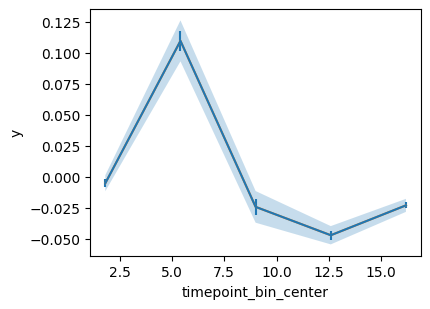

In [17]:
df = sns.load_dataset('fmri')
signal_err = np.abs(np.random.normal(size=len(df['signal'])))
signal_err[np.arange(100)] = np.nan
df['signal_err'] = signal_err
# print(df['timepoint'])
# sns.lineplot(df, x='timepoint', y='signal')
# lib.plot.lineplot(df, x='timepoint', y='signal', yerr='signal_err', weighted=True)

bins = 5

with lib.timeit.timeit('1'):
    result = lib.sp.stats.binned_mean(df['timepoint'], df['signal'], bins=bins, weighted=False)
    plt.errorbar(**result)

with lib.timeit.timeit('2'):
    df = lib.pd.digitize(df, column='timepoint', bins=bins)
    df = lib.pd.mean(df, by=['subject', 'timepoint_bin_center'], y='signal')
    # df = lib.pd.meanerr(df, by=['timepoint_bin_center'], y='signal', yerr='signalerr')
    df = lib.pd.meanerr(df.rename(columns={'signal': 'y', 'signalerr': 'yerr'}), by=['timepoint_bin_center'])
    # lib.plot.lineplot(df, x='timepoint_bin_center', y='signal', yerr='signalerr', weighted=False)
    lib.plot.lineplot(df, x='timepoint_bin_center', y='y', yerr='yerr', weighted=False)
# lib.pd.display(df)
plt.show()

[16.2 12.6  9.   1.8  5.4]
[-0.00934469 -0.1734388   0.15474943  0.31884355  0.48293766]


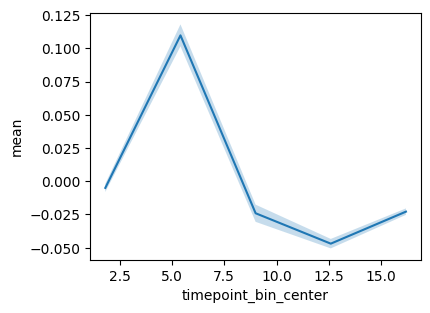

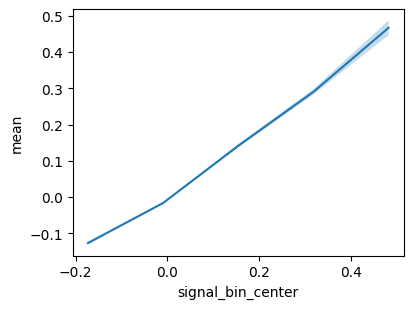

[16.2 12.6  9.   1.8  5.4] [nan 0.5]
[array([ 0. ,  3.6,  7.2, 10.8, 14.4, 18. ]), array([0., 1., 2., 3.])]


t  t_bin_center  t_bin_ledge  t_bin_redge
0     18          17.1         16.2         18.0
1     14          13.5         12.6         14.4
2     18          17.1         16.2         18.0
3     18          17.1         16.2         18.0
4     18          17.1         16.2         18.0
...   ..           ...          ...          ...
1059   8           8.1          7.2          9.0
1060   7           6.3          5.4          7.2
1061   7           6.3          5.4          7.2
1062   7           6.3          5.4          7.2
1063   0           0.9          0.0          1.8

[1064 rows x 4 columns]

In [11]:
df = sns.load_dataset('fmri')

bins = 5

df = lib.pd.digitize(df, column=['timepoint', 'signal'], bins=bins)
assert (df['signal_bin_center'] == 0.5*(df['signal_bin_ledge'] + df['signal_bin_redge'])).all()
assert (df['timepoint_bin_center'] == 0.5*(df['timepoint_bin_ledge'] + df['timepoint_bin_redge'])).all()
assert (df['signal'] >= df['signal_bin_ledge']).all() and (df['signal'] <= df['signal_bin_redge']).all()
assert (df['timepoint'] >= df['timepoint_bin_ledge']).all() and (df['timepoint'] <= df['timepoint_bin_redge']).all()
print(df['timepoint_bin_center'].unique())
print(df['signal_bin_center'].unique())
lib.pd.display(df)

df_ = df.groupby('timepoint_bin_center').agg(
    mean=('signal', 'mean'),
    sem=('signal', 'sem'),
)
lib.plot.lineplot(df_, x='timepoint_bin_center', y='mean', yerr='sem', weighted=False)
plt.show()

df_ = df.groupby('signal_bin_center').agg(
    mean=('signal', 'mean'),
    sem=('signal', 'sem'),
)
lib.plot.lineplot(df_, x='signal_bin_center', y='mean', yerr='sem', weighted=False)
plt.show()

df = sns.load_dataset('fmri')

bins = [5,[0,1,2,3]]

df, edges = lib.pd.digitize(df, column=['timepoint', 'signal'], new_cols=False, bins=bins)
print(df['timepoint'].unique(), df['signal'].unique())
print(edges)
lib.pd.display(df)

df = sns.load_dataset('fmri')
lib.pd.digitize(df['timepoint'], colname='t')

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/fmri.csv")
data['complex data'] = data['signal'] + 1.0j*data['signal']
data['np data'] = [np.ones((3,2)) for _ in range(len(data))]
data['torch data'] = [torch.ones((3,2)) for _ in range(len(data))]
data['tuple data'] = [tuple(['a', 1, 2.0, [1,2,3], (2,3), {'k': 'v'}, torch.ones(2), np.ones(2)]) for _ in range(len(data))]
data['list data'] = [['a', 1, 2.0, [1,2,3], (2,3), {'k': 'v'}, torch.ones(2), np.ones(2)] for _ in range(len(data))]
data['dict data'] = [{str(i): v for i, v in enumerate(['a', 1, 2.0, [1,2,3], (2,3), {'k': 'v'}, torch.ones(2), np.ones(2)])} for _ in range(len(data))]

In [4]:
lib.pd.display(data, verbose=True)
lib.pd.display(data, verbose=False)
lib.pd.display(data, float_format='{:.2f}'.format)